# Public Art in Pittsburgh Neighborhoods

Public art is a spirit of innovation and a tag of the inner-city culture. According to https://www.smartcitiesdive.com/ex/sustainablecitiescollective/how-tough-neighborhood-building-stronger-future-vivid-public-art/91756/, it makes the neighborhoods more vibrant and improves the social environment. Thus, we suppose that more public art pieces in the neighborhood, the better the neighborhood is.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

Let's get the public art data from the WPRDC (https://data.wprdc.org/dataset/city-of-pittsburgh-public-art/resource/00d74e83-8a23-486e-841b-286e1332a151?view_id=7c4a2734-ec64-46a0-95ad-39d4fe599ae0).
Below shows a sample of what the data looks like on the WPRDC website.

In [2]:
publicArt = pd.read_csv("public-art.csv")
publicArt.head(5)

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


Let's group the data by neighborhoods and see the number of public art pieces in each of the neighborhood:

In [3]:
length = len(publicArt.groupby("neighborhood"))
publicArt.groupby("neighborhood").count().loc[:,"id"][:length]

neighborhood
Allegheny Center             18
Allegheny West                1
Allentown                     2
Beechview                     8
Beltzhoover                   3
Bloomfield                    1
Brighton Heights              5
Brookline                     2
Carrick                       3
Central Business District    27
Central Lawrenceville         2
Central Oakland               5
Crafton Heights               1
Crawford-Roberts              3
Duquesne Heights              3
East Allegheny                2
East Carnegie                 1
East Hills                    1
East Liberty                  1
Elliott                       3
Esplen                        1
Garfield                      2
Greenfield                    3
Hays                          1
Hazelwood                     4
Highland Park                10
Knoxville                     1
Lincoln-Lemington-Belmar      2
Lower Lawrenceville           5
Manchester                    1
Mount Washington           

Furthermore, let's sort the data in descending order so we can have a better understanding of which neighborhoods have more pieces of public art.

In [4]:
art_sort = publicArt.groupby("neighborhood").count().loc[:,"id"].sort_values(ascending=False)
art_sort[:length]

neighborhood
Central Business District    27
Squirrel Hill South          22
Allegheny Center             18
South Side Flats             10
Highland Park                10
North Shore                   8
Beechview                     8
Shadyside                     6
Brighton Heights              5
Central Oakland               5
Lower Lawrenceville           5
Hazelwood                     4
Spring Hill-City View         4
Greenfield                    3
Point Breeze                  3
Elliott                       3
Duquesne Heights              3
South Side Slopes             3
Crawford-Roberts              3
Carrick                       3
Beltzhoover                   3
Spring Garden                 2
Regent Square                 2
Squirrel Hill North           2
Perry North                   2
Strip District                2
Upper Hill                    2
Mount Washington              2
Lincoln-Lemington-Belmar      2
West End                      2
Allentown                  

Plot the data as a bar graph:

<AxesSubplot:xlabel='neighborhood'>

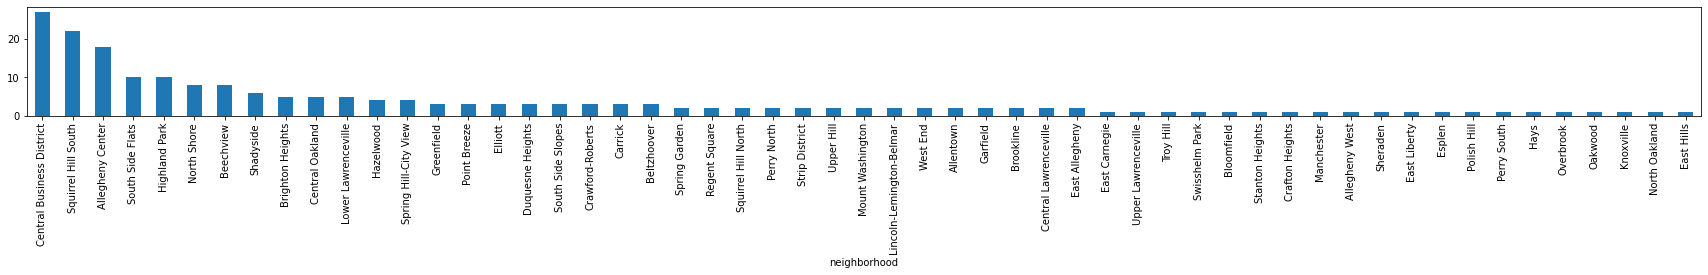

In [5]:
art_sort[:length].plot.bar(figsize = (30, 2))

Now, scale down to figure out how many pieces of public art per 100m^2 for each neighborhood. 

In [6]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods[['hood','area','geometry']]

,hood,area,geometry
0,Central Oakland,7843108.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,10278895.0,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,12713036.0,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


In [7]:
# do the merge
area_map = neighborhoods.merge(art_sort, how='left', left_on='hood', right_on='neighborhood')
area_map = area_map.rename(columns={'id':'total pieces of public art'})
# replace NaN in total pieces of public art by 0 
area_map['total pieces of public art'] = area_map['total pieces of public art'].fillna(0)
# replace NaN in area by calculation from its polygon
area_replace = area_map['geometry'].to_crs(epsg=32129)
area_map['area'] = area_map['area'].fillna(pd.to_numeric(area_replace.area))
area_map = area_map[['hood','total pieces of public art','area']]

In [8]:
# calculate number of pieces of public art per 100m^2
area_map['art_percent'] = (area_map['total pieces of public art']/(area_map['area']/10**4))
area_map

,hood,total pieces of public art,area,art_percent
0,Central Oakland,5.0,7.843108e+06,0.006375
1,North Oakland,1.0,1.390463e+07,0.000719
2,West Oakland,0.0,5.999802e+06,0.000000
3,Crawford-Roberts,3.0,7.202139e+06,0.004165
4,Strip District,2.0,1.694785e+07,0.001180
...,...,...,...,...
85,Ridgemont,0.0,1.027890e+07,0.000000
86,West End,2.0,5.579501e+06,0.003585
87,California-Kirkbride,0.0,6.050988e+06,0.000000
88,Glen Hazel,0.0,1.271304e+07,0.000000


In [9]:
area_map.describe()

,total pieces of public art,area,art_percent
count,90.000000,9.000000e+01,90.000000
mean,2.266667,1.601237e+07,0.001655
std,4.362249,1.278851e+07,0.003810
min,0.000000,2.871538e+06,0.000000
25%,0.000000,7.686451e+06,0.000000
50%,1.000000,1.185390e+07,0.000623
75%,2.000000,2.088152e+07,0.001763
max,27.000000,7.447013e+07,0.030818


The bar graph showing total number of pieces of public art per 100m^2 for each neighborhood.

<AxesSubplot:ylabel='hood'>

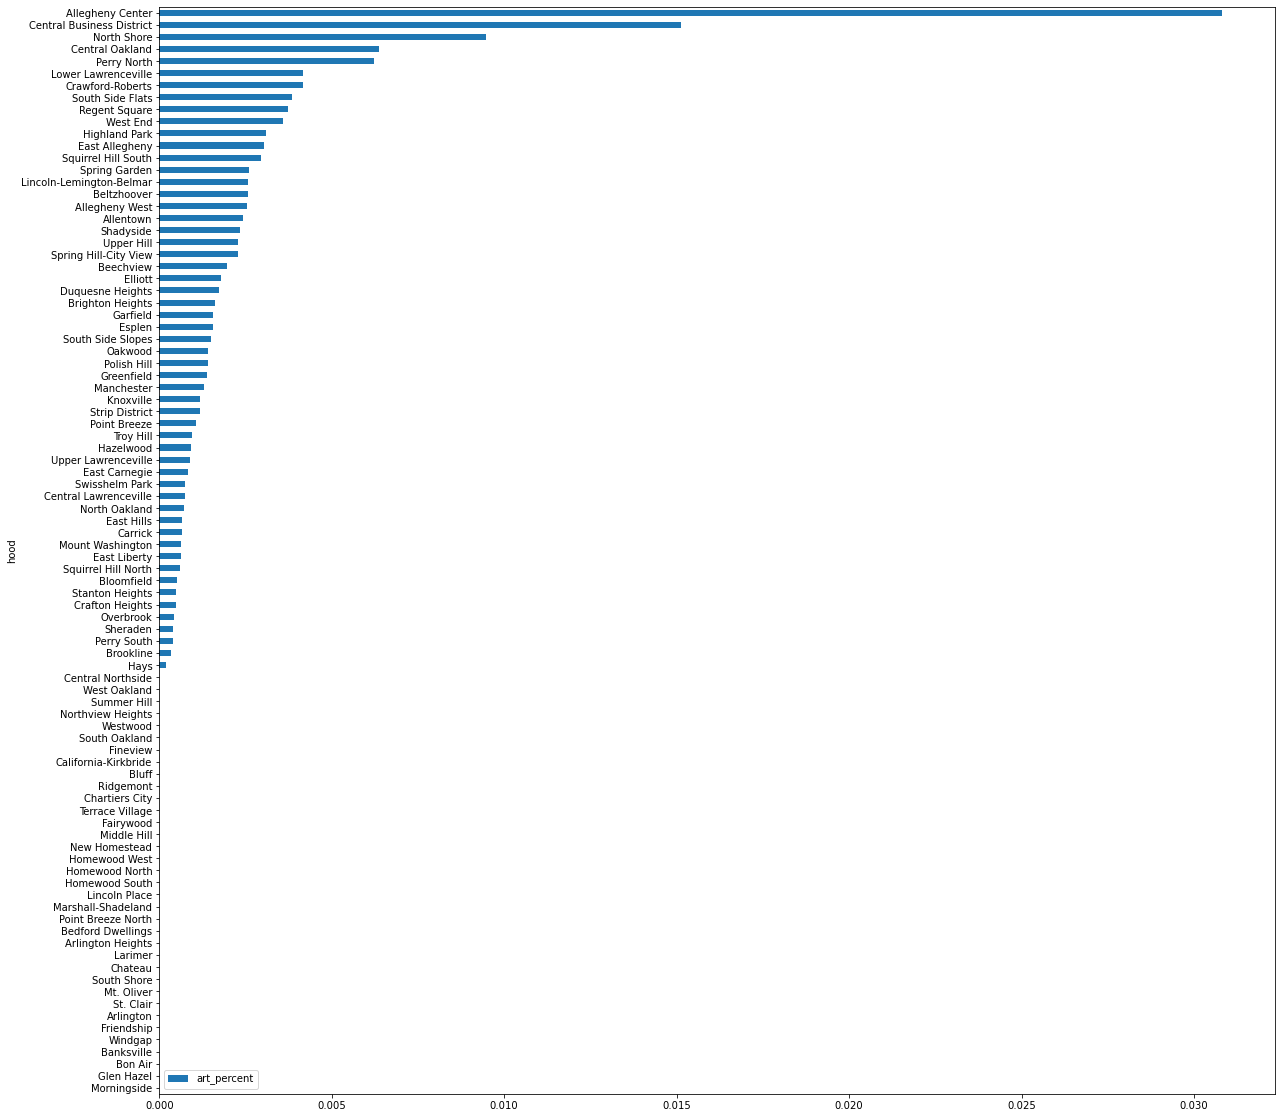

In [10]:
area_sort = area_map.sort_values(by=['art_percent'], ascending=True)
area_sort_graph = area_sort.plot.barh(x='hood', y='art_percent', figsize=(20, 20))
area_sort_graph

Based on our data, we get the conclusion that Allegheny Center has the most access to public art. 